##### Copyright 2019 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [1]:
# Copyright 2019 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

# Multilingual Universal Sentence Encoder


<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/cross_lingual_similarity_with_tf_hub_multilingual_universal_encoder.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/tensorflow/hub/blob/master/examples/colab/cross_lingual_similarity_with_tf_hub_multilingual_universal_encoder.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>


This notebook illustrates how to access the Multilingual Universal Sentence Encoder module and use it for sentence similarity across multiple languages. This module is an extension of the [original Universal Encoder module](https://tfhub.dev/google/universal-sentence-encoder/2).

# Getting Started

This section sets up the environment for access to the Multilingual Universal Sentence Encoder Module and also prepares a set of English sentences and their translations. In the following sections, the multilingual module will be used to compute similarity *across languages*.

In [2]:
# Install the latest TensorFlow version compatible with tf-sentencepiece.
!pip3 install --quiet tensorflow==1.12.0
# Install TF-Hub.
!pip3 install --quiet tensorflow-hub
!pip3 install --quiet seaborn
# Install Sentencepiece.
!pip3 install --quiet tf-sentencepiece

More detailed information about installing Tensorflow can be found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/).

In [3]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import seaborn as sns
import tf_sentencepiece

W0516 01:44:41.515611 139805337552640 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


In [4]:
# Some texts of different lengths in different languages.
english_sentences = ["dog", "Puppies are nice.", "I enjoy taking long walks along the beach with my dog."]
spanish_sentences = ["perro", "Los cachorros son agradables.", "Disfruto de dar largos paseos por la playa con mi perro."]
german_sentences = ["Hund", "Welpen sind nett.", "Ich genieße lange Spaziergänge am Strand entlang mit meinem Hund."]
french_sentences = ["chien", "Les chiots sont gentils.", "J'aime faire de longues promenades sur la plage avec mon chien."]
italian_sentences = ["cane", "I cuccioli sono carini.", "Mi piace fare lunghe passeggiate lungo la spiaggia con il mio cane."]
chinese_sentences = ["狗", "小狗很好。", "我喜欢和我的狗一起沿着海滩散步。"]
korean_sentences = ["개", "강아지가 좋다.", "나는 나의 산책을 해변을 따라 길게 산책하는 것을 즐긴다."]
japanese_sentences = ["犬", "子犬はいいです", "私は犬と一緒にビーチを散歩するのが好きです"]

## Computing Text Embeddings
We first precompute the embeddings for all of our sentences.

In [5]:
# The 8-language multilingual module. There are also en-es, en-de, and en-fr bilingual modules.
module_url = "https://tfhub.dev/google/universal-sentence-encoder-xling-many/1"

# Set up graph.
g = tf.Graph()
with g.as_default():
  text_input = tf.placeholder(dtype=tf.string, shape=[None])
  xling_8_embed = hub.Module(module_url)
  embedded_text = xling_8_embed(text_input)
  init_op = tf.group([tf.global_variables_initializer(), tf.tables_initializer()])
g.finalize()

# Initialize session.
session = tf.Session(graph=g)
session.run(init_op)

# Compute embeddings.
en_result = session.run(embedded_text, feed_dict={text_input: english_sentences})
es_result = session.run(embedded_text, feed_dict={text_input: spanish_sentences})
de_result = session.run(embedded_text, feed_dict={text_input: german_sentences})
fr_result = session.run(embedded_text, feed_dict={text_input: french_sentences})
it_result = session.run(embedded_text, feed_dict={text_input: italian_sentences})
zh_result = session.run(embedded_text, feed_dict={text_input: chinese_sentences})
ko_result = session.run(embedded_text, feed_dict={text_input: korean_sentences})
ja_result = session.run(embedded_text, feed_dict={text_input: japanese_sentences})

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0516 01:45:32.417637 139805337552640 tf_logging.py:115] Saver not created because there are no variables in the graph to restore


## Visualize Embedding Similarity
With the sentence embeddings now in hand, we can visualize semantic similarity across different languages.

In [6]:
def visualize_similarity(embeddings_1, embeddings_2, labels_1, labels_2, plot_title):
  corr = np.inner(embeddings_1, embeddings_2)
  g = sns.heatmap(corr,
                  xticklabels=labels_1,
                  yticklabels=labels_2,
                  vmin=0,
                  vmax=1,
                  cmap="YlOrRd")
  g.set_yticklabels(g.get_yticklabels(), rotation=0)
  g.set_title(plot_title)

### English-Italian Similarity

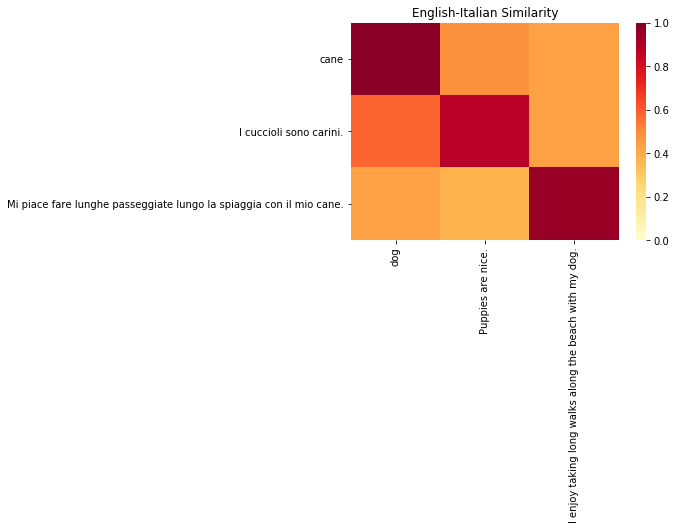

In [7]:
visualize_similarity(en_result, it_result, english_sentences, italian_sentences, "English-Italian Similarity")

### English-Japanese Similarity

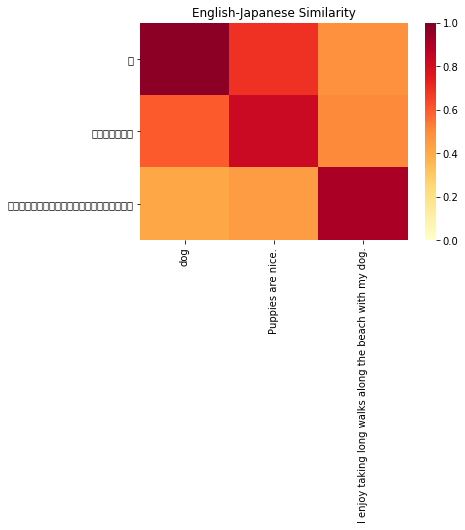

In [8]:
visualize_similarity(en_result, ja_result, english_sentences, japanese_sentences, "English-Japanese Similarity")

### Italian-Japanese Similarity

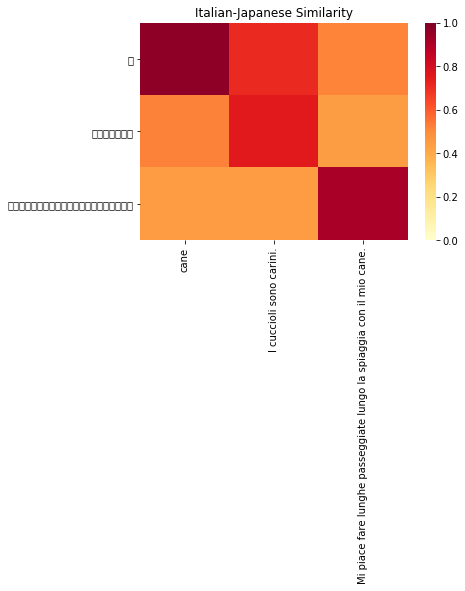

In [9]:
visualize_similarity(it_result, ja_result, italian_sentences, japanese_sentences, "Italian-Japanese Similarity")

### And more...

The above examples can be extended to any language pair from **English, Spanish, German, French, Italian, Chinese, Korean, and Japanese**. Happy coding!